<a href="https://colab.research.google.com/github/TimiUU/wine/blob/main/food_feature_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the CSV file and delete some unnecessary part.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ID2223project/wfp_food_prices_afg.csv')
df = df.drop(0)
df = df.drop(['pricetype', 'currency'], axis=1)
df = df.drop(['admin1', 'admin2'], axis=1)
df.drop(df[df['category'] == 'non-food'].index, inplace=True)
df.drop(df[df['priceflag'] == 'actual'].index, inplace=True)
df = df.drop(['unit', 'priceflag'], axis=1)
df = df.drop(['category', 'usdprice'], axis=1)
df = df.drop(['latitude', 'longitude'], axis=1)
df = df.reset_index(drop=True)
df.head()


,date,market,commodity,price
0,2020-05-15,Badakhshan,Bread,50.0
1,2020-05-15,Badakhshan,Rice (high quality),98.75
2,2020-05-15,Badakhshan,Rice (low quality),66.75
3,2020-05-15,Badakhshan,Wheat,31.0
4,2020-05-15,Badakhshan,Wheat flour (high quality),42.0


In [81]:
unique_values = df['commodity'].unique()
print(unique_values)

['Bread' 'Rice (high quality)' 'Rice (low quality)' 'Wheat'
 'Wheat flour (high quality)' 'Wheat flour (low quality)' 'Salt' 'Sugar'
 'Oil (cooking)' 'Pulses']


In [82]:
unique_values = df['market'].unique()
print(unique_values)

['Badakhshan' 'Badghis' 'Baghlan' 'Balkh' 'Bamyan' 'Daykundi' 'Farah'
 'Faryab' 'Ghazni' 'Ghor' 'Hilmand' 'Hirat' 'Jawzjan' 'Kabul' 'Kandahar'
 'Kapisa' 'Khost' 'Kunar' 'Kunduz' 'Laghman' 'Logar' 'Nangarhar' 'Nimroz'
 'Nuristan' 'Paktika' 'Paktya' 'Panjsher' 'Parwan' 'Samangan' 'Sar-e-Pul'
 'Takhar' 'Uruzgan' 'Maidan Wardak' 'Zabul']


In [83]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14938 entries, 0 to 14937
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14938 non-null  datetime64[ns]
 1   market     14938 non-null  object        
 2   commodity  14938 non-null  object        
 3   price      14938 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 583.5+ KB


In [84]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,market,commodity,price,year,month,day
0,2020-05-15,Badakhshan,Bread,50.0,2020,5,15
231,2020-05-15,Nuristan,Rice (high quality),84.0,2020,5,15
230,2020-05-15,Nuristan,Bread,50.0,2020,5,15
229,2020-05-15,Nimroz,Pulses,133.5,2020,5,15
228,2020-05-15,Nimroz,Oil (cooking),101.25,2020,5,15


In [85]:
df= df.drop(['date'], axis=1)
df['date_as_integer'] = df['year'] * 10000 + df['month'] * 100 + df['day']
df.head()

,market,commodity,price,year,month,day,date_as_integer
0,Badakhshan,Bread,50.0,2020,5,15,20200515
231,Nuristan,Rice (high quality),84.0,2020,5,15,20200515
230,Nuristan,Bread,50.0,2020,5,15,20200515
229,Nimroz,Pulses,133.5,2020,5,15,20200515
228,Nimroz,Oil (cooking),101.25,2020,5,15,20200515


In [86]:
df= df.drop(['year'], axis=1)
df= df.drop(['month'], axis=1)
df= df.drop(['day'], axis=1)
df.head()

,market,commodity,price,date_as_integer
0,Badakhshan,Bread,50.0,20200515
231,Nuristan,Rice (high quality),84.0,20200515
230,Nuristan,Bread,50.0,20200515
229,Nimroz,Pulses,133.5,20200515
228,Nimroz,Oil (cooking),101.25,20200515


In [108]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['market', 'commodity']])

scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])
df_date = df.copy()
df_date['date_as_integer'] = (df['date_as_integer']-20200000)/100000

encoded_df = pd.concat([pd.DataFrame(encoded_data.toarray()), df_date['date_as_integer'], df['price']], axis=1)

encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,date_as_integer,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00515,0.173228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00515,0.365157
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00515,0.239173
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00515,0.098425
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00515,0.141732


Transfer the market name and food name in One-Hot Encoding.

In [88]:
encoded_df.to_csv('/content/drive/MyDrive/ID2223project/encoded_df.csv', index=False)

In [109]:
window_size = 30

In [110]:
X = []
y = []
for i in range(window_size, len(encoded_df)):
    X.append(encoded_df.iloc[i-window_size:i, :-1].values)
    y.append(encoded_df.iloc[i, -1])

In [111]:
import numpy as np
X, y = np.array(X), np.array(y)


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [113]:
print(X_test)

[[[0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  ...
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      1.      0.30415]]

 [[0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  ...
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      1.      0.30415]
  [0.      0.      0.      ... 1.      0.      0.30415]]

 [[0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  [0.      0.      0.      ... 0.      0.      0.30415]
  ...
  [0.      0.      0.      ... 0.      1.      0.30415]
  [0.      0.      0.      ... 1.      0.      0.30415]
  [0.      0.      0.     

In [114]:
print(y_train)

[0.22440945 0.33267717 0.15354331 ... 0.01759843 0.23098425 0.45877953]


In [115]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))  # 添加额外的LSTM层
model.add(LSTM(units=50))  # 添加额外的LSTM层
model.add(Dense(units=1))
es = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [116]:
model.compile(optimizer='adam', loss='mse')

In [117]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)  # 调整学习率
model.compile(optimizer=optimizer, loss='mse')

In [118]:
print(y_train)

[0.22440945 0.33267717 0.15354331 ... 0.01759843 0.23098425 0.45877953]


In [119]:
print(y_test)

[0.5011811  0.25590551 0.4515748  ... 0.25870079 0.41271654 0.45933071]


In [120]:
model.fit(X_train, y_train, epochs=30, callbacks=[es],batch_size=32)

Epoch 1/30
373/373 [==============================] - ETA: 0s - loss: 0.0232

373/373 [==============================] - 24s 50ms/step - loss: 0.0232
Epoch 2/30
373/373 [==============================] - ETA: 0s - loss: 0.0161

373/373 [==============================] - 19s 50ms/step - loss: 0.0161
Epoch 3/30
373/373 [==============================] - ETA: 0s - loss: 0.0119

373/373 [==============================] - 20s 54ms/step - loss: 0.0119
Epoch 4/30
372/373 [============================>.] - ETA: 0s - loss: 0.0088

373/373 [==============================] - 19s 51ms/step - loss: 0.0088
Epoch 5/30
372/373 [============================>.] - ETA: 0s - loss: 0.0076

373/373 [==============================] - 18s 49ms/step - loss: 0.0076
Epoch 6/30
373/373 [==============================] - ETA: 0s - loss: 0.0061

373/373 [==============================] - 18s 49ms/step - loss: 0.0061
Epoch 7/30
373/373 [==============================] - ETA: 0s - loss: 0.0051

373/373 [==============================] - 18s 49ms/step - loss: 0.0051
Epoch 8/30
373/373 [==============================] - ETA: 0s - loss: 0.0048

373/373 [==============================] - 18s 49ms/step - loss: 0.0048
Epoch 9/30
373/373 [==============================] - ETA: 0s - loss: 0.0044

373/373 [==============================] - 19s 51ms/step - loss: 0.0044
Epoch 10/30
373/373 [==============================] - ETA: 0s - loss: 0.0041

373/373 [==============================] - 20s 53ms/step - loss: 0.0041
Epoch 11/30
373/373 [==============================] - ETA: 0s - loss: 0.0039

373/373 [==============================] - 19s 50ms/step - loss: 0.0039
Epoch 12/30
372/373 [============================>.] - ETA: 0s - loss: 0.0037

373/373 [==============================] - 18s 49ms/step - loss: 0.0037
Epoch 13/30
373/373 [==============================] - ETA: 0s - loss: 0.0036

373/373 [==============================] - 18s 49ms/step - loss: 0.0036
Epoch 14/30
373/373 [==============================] - ETA: 0s - loss: 0.0034

373/373 [==============================] - 18s 49ms/step - loss: 0.0034
Epoch 15/30
373/373 [==============================] - ETA: 0s - loss: 0.0033

373/373 [==============================] - 18s 49ms/step - loss: 0.0033
Epoch 16/30
373/373 [==============================] - ETA: 0s - loss: 0.0033

373/373 [==============================] - 19s 52ms/step - loss: 0.0033
Epoch 17/30
373/373 [==============================] - ETA: 0s - loss: 0.0032

373/373 [==============================] - 20s 54ms/step - loss: 0.0032
Epoch 18/30
372/373 [============================>.] - ETA: 0s - loss: 0.0031

373/373 [==============================] - 18s 49ms/step - loss: 0.0031
Epoch 19/30
372/373 [============================>.] - ETA: 0s - loss: 0.0030

373/373 [==============================] - 18s 49ms/step - loss: 0.0030
Epoch 20/30
372/373 [============================>.] - ETA: 0s - loss: 0.0029

373/373 [==============================] - 18s 49ms/step - loss: 0.0029
Epoch 21/30
373/373 [==============================] - ETA: 0s - loss: 0.0028

373/373 [==============================] - 18s 49ms/step - loss: 0.0028
Epoch 22/30
373/373 [==============================] - ETA: 0s - loss: 0.0029

373/373 [==============================] - 19s 50ms/step - loss: 0.0029
Epoch 23/30
373/373 [==============================] - ETA: 0s - loss: 0.0028

373/373 [==============================] - 20s 53ms/step - loss: 0.0028
Epoch 24/30
372/373 [============================>.] - ETA: 0s - loss: 0.0028

373/373 [==============================] - 19s 52ms/step - loss: 0.0028
Epoch 25/30
373/373 [==============================] - ETA: 0s - loss: 0.0026

373/373 [==============================] - 18s 49ms/step - loss: 0.0026
Epoch 26/30
373/373 [==============================] - ETA: 0s - loss: 0.0029

373/373 [==============================] - 18s 49ms/step - loss: 0.0029
Epoch 27/30
372/373 [============================>.] - ETA: 0s - loss: 0.0027

373/373 [==============================] - 18s 49ms/step - loss: 0.0027
Epoch 28/30
372/373 [============================>.] - ETA: 0s - loss: 0.0025

373/373 [==============================] - 18s 49ms/step - loss: 0.0025
Epoch 29/30
373/373 [==============================] - ETA: 0s - loss: 0.0025

373/373 [==============================] - 19s 52ms/step - loss: 0.0025
Epoch 30/30
373/373 [==============================] - ETA: 0s - loss: 0.0025

373/373 [==============================] - 20s 53ms/step - loss: 0.0025


In [121]:
predicted_prices = model.predict(X_test)

94/94 [==============================] - 3s 20ms/step


In [40]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [122]:

print(predicted_prices[:5])


[[0.5023993 ]
 [0.24372718]
 [0.44706786]
 [0.18394685]
 [0.1388513 ]]


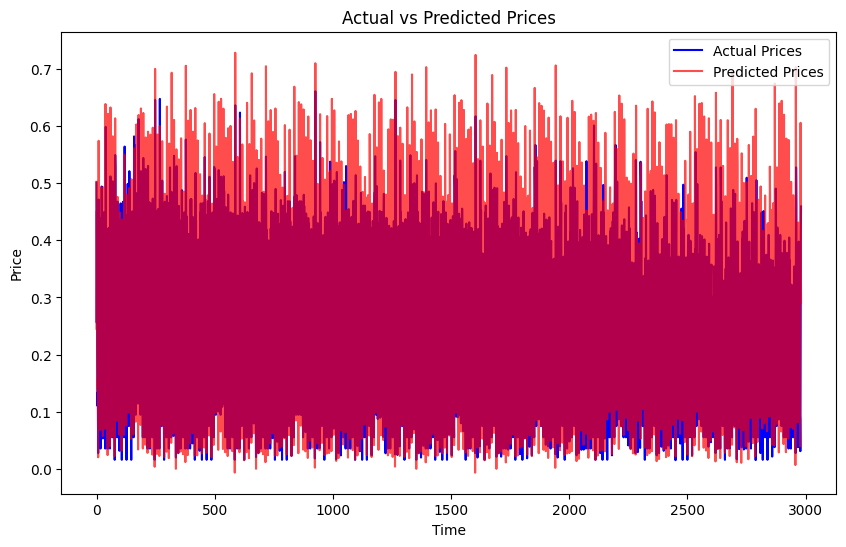

In [123]:
import matplotlib.pyplot as plt

actual_prices = y_test

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', alpha=0.7, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [124]:
import pandas as pd

results = pd.DataFrame({'Actual': actual_prices.flatten(), 'Predicted': predicted_prices.flatten()})
print(results.head())


     Actual  Predicted
0  0.501181   0.502399
1  0.255906   0.243727
2  0.451575   0.447068
3  0.212598   0.183947
4  0.110236   0.138851


In [125]:
results = []
for i, prediction in enumerate(predicted_prices):

    market_food_encoding = X_test[i, -1, :len(encoder.categories_[0])+len(encoder.categories_[1])]
    market_food = encoder.inverse_transform([market_food_encoding])[0]


    date = df.iloc[i + window_size]['date']


    result = {'date': date, 'market': market_food[0], 'food': market_food[1], 'predicted_price': prediction[0]}
    results.append(result)

results_df = pd.DataFrame(results)
results_df.head()



KeyError: ignored

In [51]:
results_df.to_csv('/content/drive/MyDrive/ID2223project/predicted_prices.csv', index=False)

Split the data to traning set and test set.

In [52]:
split_point = int(len(df_encoded) * 0.8)
train_df = df_encoded[:split_point]
test_df = df_encoded[split_point:]
train_df.head()

,date,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,...,commodity_Bread,commodity_Oil (cooking),commodity_Pulses,commodity_Rice (high quality),commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality)
0,2020-05-15,50.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020-05-15,98.75,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2020-05-15,66.75,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2020-05-15,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020-05-15,42.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
trasn_df = pd.DataFrame(transformed.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ID2223project/predicted_prices.csv')

In [126]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(X_train, X_test, y_train, y_test, model):

    report = {}

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    y_pred = model.predict(X_test)

    model_name=LSTM

    # 存储评估结果到 report 字典
    report[model_name] = {
        "R2 SCORE": r2score,
        "MEAN SQUARED ERROR": mse,
        "MEAN ABSOLUTE ERROR": mae
    }

    return report

In [127]:
model_matrics = evaluate_model(X_train, X_test, y_train, y_test, model)
for model_name, metrics in model_matrics.items():
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {metrics['R2 SCORE']}")
    print(f"  Mean Squared Error: {metrics['MEAN SQUARED ERROR']}")
    print(f"  Mean Absolute Error: {metrics['MEAN ABSOLUTE ERROR']}")
    print("\n" + "=" * 30 + "\n")

94/94 [==============================] - 1s 14ms/step
<class 'keras.src.layers.rnn.lstm.LSTM'> Metrics:
  Accuracy: 0.7078250787184094
  Mean Squared Error: 0.006155994241404601
  Mean Absolute Error: 0.052043296861065576




In [ ]:
import gradio as gr
import numpy as np


def Price_predict_input(Date, Market,Food_type):
  input= np.array(Date,Market,Food_type)
  price=model.predict(input)
  predicted_prices = scaler.inverse_transform(price)
  return predicted_prices


Date_selectbox = gr.SelectBox(choices=["January", "February", "March", "April", "May", "June",
                                       "July", "August", "September", "October" ,"November" ,"December"], label="Choose an mouth:")

Market_selectbox = gr.SelectBox(choices=["January", "February", "March", "April", "May", "June",
                                       "July", "August", "September", "October" ,"November" ,"December"], label="Choose a market:")

Food_type_selectbox = gr.SelectBox(choices=["'Bread", "Rice (high quality)", "Rice (low quality)", "Wheat", "Wheat flour (high quality)",
                                            "Wheat flour (low quality)", "Salt", "Sugar", "Oil (cooking)", "Pulses"], label="Choose a type of food:")



iface = gr.Interface(
    fn=Price_predict_input,
    inputs=[
             Date_selectbox,
             Market_selectbox,
             Food_type_selectbox,
             ],
    outputs="text",
    title="Pridict of food price",
    description=".",
)

iface.launch(share=True)